In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'f1715f64-5e89-40ff-ba3d-12ad0b63c634',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [ ]:
type(data)

In [ ]:
import pandas as pd


#Show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#Normalize the data in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

In [ ]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'f1715f64-5e89-40ff-ba3d-12ad0b63c634',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
  
  
    # Create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\avery\Desktop\Projects\Portfolio Projects\Crypto API Pull Project\API.csv'):
        df.to_csv(r'C:\Users\avery\Desktop\Projects\Portfolio Projects\Crypto API Pull Project\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\avery\Desktop\Projects\Portfolio Projects\Crypto API Pull Project\API.csv', mode='a', header=False)

In [ ]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

In [ ]:
df72 = pd.read_csv(r'C:\Users\avery\Desktop\Projects\Portfolio Projects\Crypto API Pull Project\API.csv')
df72

In [ ]:
df

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
df

In [ ]:
# Show coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

In [ ]:
df4 = df3.stack()
df4

In [ ]:
type(df4)

In [ ]:
df5 = df4.to_frame(name='values')
df5

In [ ]:
df5.count()

In [112]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.75113
1,Bitcoin,quote.USD.percent_change_24h,3.47978
2,Bitcoin,quote.USD.percent_change_7d,3.17973
3,Bitcoin,quote.USD.percent_change_30d,0.06189
4,Bitcoin,quote.USD.percent_change_60d,14.08646
5,Bitcoin,quote.USD.percent_change_90d,8.63721
6,Ethereum,quote.USD.percent_change_1h,0.67260
7,Ethereum,quote.USD.percent_change_24h,2.69511
8,Ethereum,quote.USD.percent_change_7d,1.26263
9,Ethereum,quote.USD.percent_change_30d,0.32524


In [113]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.75113
1,Bitcoin,quote.USD.percent_change_24h,3.47978
2,Bitcoin,quote.USD.percent_change_7d,3.17973
3,Bitcoin,quote.USD.percent_change_30d,0.06189
4,Bitcoin,quote.USD.percent_change_60d,14.08646
5,Bitcoin,quote.USD.percent_change_90d,8.63721
6,Ethereum,quote.USD.percent_change_1h,0.67260
7,Ethereum,quote.USD.percent_change_24h,2.69511
8,Ethereum,quote.USD.percent_change_7d,1.26263
9,Ethereum,quote.USD.percent_change_30d,0.32524


In [119]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.75113
1,Bitcoin,24h,3.47978
2,Bitcoin,7d,3.17973
3,Bitcoin,30d,0.06189
4,Bitcoin,60d,14.08646
5,Bitcoin,90d,8.63721
6,Ethereum,1h,0.67260
7,Ethereum,24h,2.69511
8,Ethereum,7d,1.26263
9,Ethereum,30d,0.32524


In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\avery\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


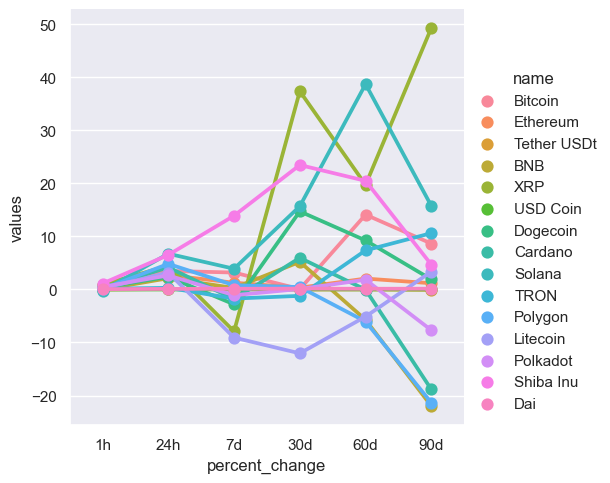

In [120]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [117]:
# Pull just one crypto value with timestamp

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,30176.79624,2023-08-08 14:23:41.884808


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

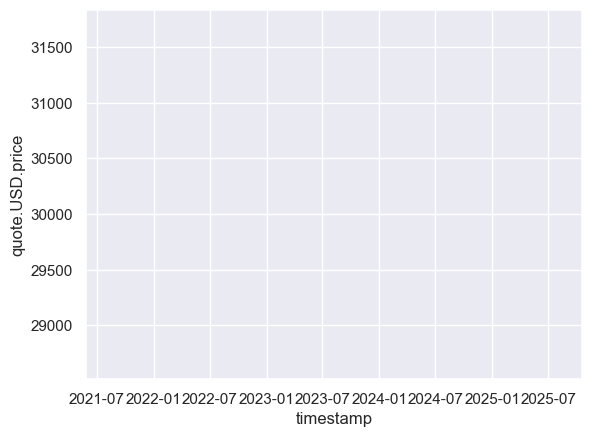

In [133]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)